In [6]:
import pandas as pd
import requests as req
from bs4 import BeautifulSoup
import re as regex
from datetime import datetime
import seaborn as sns

In [7]:
url = 'https://www.nairaland.com'
raw_html = req.get(url)

html_data = raw_html.text

soup_data = BeautifulSoup(html_data, 'lxml')


In [8]:
for data in soup_data('td'):
    print(data.text)

₦airaland Forum Welcome, Guest: Join Nairaland / LOGIN! / Trending / Recent / NewStats: 2,042,798 members, 4,381,708 topics. Date: Sunday, 29 July 2018 at 10:54 PM 
 
Nairaland / General: Politics, Crime, Romance, Jobs/Vacancies, Career, Business, Investment, NYSC, Education, Autos, Car Talk, Properties, Health, Travel, Family, Culture, Religion, Food, Diaries, Nairaland Ads, Pets, Agriculture
Entertainment: Jokes Etc, TV/Movies, Music/Radio, Celebrities, Fashion, Events, Sports, Gaming, Forum Games, Literature
Science/Technology: Programming, Webmasters, Computers, Phones, Art, Graphics & Video, Technology Market
 Featured Links / Twitter  / Facebook  / How To Advertise 
 » Army Recovers Arms Cache Near Otuoke In Bayelsa «» "Our Culture Of Marital Pressure And Shaming People Isn't Good" - Lady Says «» Man Shares Photos Of A Cooking Pot That Costs Over N400k, Nigerians React «» Married Nigerian Man Robbed In Kenyan Hotel While Visiting His Lover (Photos) «» President Buhari Arrives Tog

### Extract Usernames and birthdays using regular expression.

Nairaland now displays celebrants with the same age together(usernames seperated by commas followed by their common age in braces), so I changed the regex a little to accomodate that...

In [9]:
member_found = None

pattern = '[\w]+\([\d]+\)'
new_pattern = '[\w]+,* *[\w]+\([\d]+\)'
for data in soup_data('td'):
    data_found = regex.findall(new_pattern, data.text)
    
    if data_found:
        member_found = data_found

print(member_found)

['bukiboy, luvuinxs(40)', 'osifred(29)', 'eedrees(28)', 'jimwest, DerrickM(35)', 'shady45(29)', 'Ugik, femtopyy(40)', 'miracle4, Martini101(31)', 'Kingsron, wckabuoh(34)', 'carluva(25)', 'henryhco(27)', 'Sundahjoe(28)', 'Mosunbabe(23)', 'dasparrow, royalharry(30)', 'Lucid1, Badirukehinde(24)', 'WHIZKIDEFE(24)', 'ShobayoEmma(31)', 'Tundetiler2011(33)', 'Ijawboy(37)', 'psalmz, Fortune1909(24)', 'ajayi147(34)', 'Ayoswit, maberry(33)', 'Nexusz(26)', 'cryles(28)', 'davidodiba(34)', 'gajasalot, Ajiswaggs(24)', 'mcdreeezy(24)', 'roaringlamb01(31)', 'Dimejimichael(25)', 'ProfEinstein(36)', 'amarudeen, cheeketo(19)', 'LAVIKTA(28)', 'Chibueze291994, hamzatabu(26)', 'Momcherry(39)', 'ifypoly, bassey25(28)', 'jbc2u(27)', 'cremeflora(24)', 'PweetyHitee(26)', 'joywonderment, Jay20(25)', 'Davexx, Marley40(33)', 'victor048(24)', 'gentlejin, julietdammy(28)', 'freezycharly(25)', 'annayawchee, krinsmal(28)', 'iomoge2, joff2(22)', 'SHAMHOOD(24)', 'D34lw4p(22)', 'lilEmir3(18)', 'thumpsupautos(39)', 'mrsth

In [10]:
#Remove the ending brace...by replacing it with empty string...

replaced_member_found = [x.replace(')', '') for x in member_found]

print(replaced_member_found)

['bukiboy, luvuinxs(40', 'osifred(29', 'eedrees(28', 'jimwest, DerrickM(35', 'shady45(29', 'Ugik, femtopyy(40', 'miracle4, Martini101(31', 'Kingsron, wckabuoh(34', 'carluva(25', 'henryhco(27', 'Sundahjoe(28', 'Mosunbabe(23', 'dasparrow, royalharry(30', 'Lucid1, Badirukehinde(24', 'WHIZKIDEFE(24', 'ShobayoEmma(31', 'Tundetiler2011(33', 'Ijawboy(37', 'psalmz, Fortune1909(24', 'ajayi147(34', 'Ayoswit, maberry(33', 'Nexusz(26', 'cryles(28', 'davidodiba(34', 'gajasalot, Ajiswaggs(24', 'mcdreeezy(24', 'roaringlamb01(31', 'Dimejimichael(25', 'ProfEinstein(36', 'amarudeen, cheeketo(19', 'LAVIKTA(28', 'Chibueze291994, hamzatabu(26', 'Momcherry(39', 'ifypoly, bassey25(28', 'jbc2u(27', 'cremeflora(24', 'PweetyHitee(26', 'joywonderment, Jay20(25', 'Davexx, Marley40(33', 'victor048(24', 'gentlejin, julietdammy(28', 'freezycharly(25', 'annayawchee, krinsmal(28', 'iomoge2, joff2(22', 'SHAMHOOD(24', 'D34lw4p(22', 'lilEmir3(18', 'thumpsupautos(39', 'mrstheo, jamesy212(28', 'DIAMOND1G39(27', 'nickyzeb(2

In [11]:
#Split the usernames and ages using the opening brace as a delimiter... Here, you see the users with the same age are
#grouped...

for y in replaced_member_found:
    cleaned_member = y.split('(')
    print(cleaned_member)
    

['bukiboy, luvuinxs', '40']
['osifred', '29']
['eedrees', '28']
['jimwest, DerrickM', '35']
['shady45', '29']
['Ugik, femtopyy', '40']
['miracle4, Martini101', '31']
['Kingsron, wckabuoh', '34']
['carluva', '25']
['henryhco', '27']
['Sundahjoe', '28']
['Mosunbabe', '23']
['dasparrow, royalharry', '30']
['Lucid1, Badirukehinde', '24']
['WHIZKIDEFE', '24']
['ShobayoEmma', '31']
['Tundetiler2011', '33']
['Ijawboy', '37']
['psalmz, Fortune1909', '24']
['ajayi147', '34']
['Ayoswit, maberry', '33']
['Nexusz', '26']
['cryles', '28']
['davidodiba', '34']
['gajasalot, Ajiswaggs', '24']
['mcdreeezy', '24']
['roaringlamb01', '31']
['Dimejimichael', '25']
['ProfEinstein', '36']
['amarudeen, cheeketo', '19']
['LAVIKTA', '28']
['Chibueze291994, hamzatabu', '26']
['Momcherry', '39']
['ifypoly, bassey25', '28']
['jbc2u', '27']
['cremeflora', '24']
['PweetyHitee', '26']
['joywonderment, Jay20', '25']
['Davexx, Marley40', '33']
['victor048', '24']
['gentlejin, julietdammy', '28']
['freezycharly', '25']


### Further cleaning necessary because of new regex...

In [12]:
# Here, we first split each line as was done in cell above...
# Then we attempt to split the multiple usernames using a comma then a space as delimiter...
# If only one username is present, the second split does nothing...
# Finally, for each username, we assign the last element of the first split as the age...hence, the negative index...

cleaned_member = {}
for y in replaced_member_found:
    temp_data = y.split('(')
    multiple_temp_data = temp_data[0].split(', ')
    for user in multiple_temp_data:
        cleaned_member[user] = int(temp_data[-1])
print(cleaned_member)

{'bukiboy': 40, 'luvuinxs': 40, 'osifred': 29, 'eedrees': 28, 'jimwest': 35, 'DerrickM': 35, 'shady45': 29, 'Ugik': 40, 'femtopyy': 40, 'miracle4': 31, 'Martini101': 31, 'Kingsron': 34, 'wckabuoh': 34, 'carluva': 25, 'henryhco': 27, 'Sundahjoe': 28, 'Mosunbabe': 23, 'dasparrow': 30, 'royalharry': 30, 'Lucid1': 24, 'Badirukehinde': 24, 'WHIZKIDEFE': 24, 'ShobayoEmma': 31, 'Tundetiler2011': 33, 'Ijawboy': 37, 'psalmz': 24, 'Fortune1909': 24, 'ajayi147': 34, 'Ayoswit': 33, 'maberry': 33, 'Nexusz': 26, 'cryles': 28, 'davidodiba': 34, 'gajasalot': 24, 'Ajiswaggs': 24, 'mcdreeezy': 24, 'roaringlamb01': 31, 'Dimejimichael': 25, 'ProfEinstein': 36, 'amarudeen': 19, 'cheeketo': 19, 'LAVIKTA': 28, 'Chibueze291994': 26, 'hamzatabu': 26, 'Momcherry': 39, 'ifypoly': 28, 'bassey25': 28, 'jbc2u': 27, 'cremeflora': 24, 'PweetyHitee': 26, 'joywonderment': 25, 'Jay20': 25, 'Davexx': 33, 'Marley40': 33, 'victor048': 24, 'gentlejin': 28, 'julietdammy': 28, 'freezycharly': 25, 'annayawchee': 28, 'krinsmal'

In [13]:
column_names = ['users', 'Age']

dFrame = pd.DataFrame(list(cleaned_member.items()), columns = column_names)

dFrame

,users,Age
0,bukiboy,40
1,luvuinxs,40
2,osifred,29
3,eedrees,28
4,jimwest,35
5,DerrickM,35
6,shady45,29
7,Ugik,40
8,femtopyy,40
9,miracle4,31


In [14]:
current_date = datetime.now().date()

dFrame['date'] = current_date
dFrame

,users,Age,date
0,bukiboy,40,2018-07-29
1,luvuinxs,40,2018-07-29
2,osifred,29,2018-07-29
3,eedrees,28,2018-07-29
4,jimwest,35,2018-07-29
5,DerrickM,35,2018-07-29
6,shady45,29,2018-07-29
7,Ugik,40,2018-07-29
8,femtopyy,40,2018-07-29
9,miracle4,31,2018-07-29


In [15]:
fileName = current_date.strftime('%Y%m%d')

dFrame.to_csv(fileName + '.csv')

In [16]:
dFrame.describe()

,Age
count,118.000000
mean,28.584746
std,7.178227
min,17.000000
25%,24.000000
50%,28.000000
75%,31.000000
max,66.000000


### Oldest Members of the celebrants

In [17]:
dFrame.sort_values(by='Age', ascending= False)[:10]

,users,Age,date
116,Babadgreat,66,2018-07-29
112,Aydgr8don,58,2018-07-29
95,Deoboss,45,2018-07-29
84,madegreatbygrace,44,2018-07-29
0,bukiboy,40,2018-07-29
7,Ugik,40,2018-07-29
8,femtopyy,40,2018-07-29
1,luvuinxs,40,2018-07-29
65,thumpsupautos,39,2018-07-29
44,Momcherry,39,2018-07-29


### Youngest celebrants

In [18]:
dFrame.sort_values(by = 'Age', ascending = True)[:10]

,users,Age,date
102,saheedinho,17,2018-07-29
101,FloraEC,17,2018-07-29
64,lilEmir3,18,2018-07-29
77,elikzeey,18,2018-07-29
106,GhostTM,19,2018-07-29
105,Izabel,19,2018-07-29
40,cheeketo,19,2018-07-29
39,amarudeen,19,2018-07-29
96,ennyjay72,19,2018-07-29
117,bigbills22,22,2018-07-29


### Celebrants' Ages in 10 years

In [19]:
dFrame['Age_plus_10'] = dFrame['Age'] + 10
dFrame

,users,Age,date,Age_plus_10
0,bukiboy,40,2018-07-29,50
1,luvuinxs,40,2018-07-29,50
2,osifred,29,2018-07-29,39
3,eedrees,28,2018-07-29,38
4,jimwest,35,2018-07-29,45
5,DerrickM,35,2018-07-29,45
6,shady45,29,2018-07-29,39
7,Ugik,40,2018-07-29,50
8,femtopyy,40,2018-07-29,50
9,miracle4,31,2018-07-29,41


### Age when Nairaland was established.

In [20]:
dFrame['Age at 2005'] = dFrame['Age'] - 13
dFrame

,users,Age,date,Age_plus_10,Age at 2005
0,bukiboy,40,2018-07-29,50,27
1,luvuinxs,40,2018-07-29,50,27
2,osifred,29,2018-07-29,39,16
3,eedrees,28,2018-07-29,38,15
4,jimwest,35,2018-07-29,45,22
5,DerrickM,35,2018-07-29,45,22
6,shady45,29,2018-07-29,39,16
7,Ugik,40,2018-07-29,50,27
8,femtopyy,40,2018-07-29,50,27
9,miracle4,31,2018-07-29,41,18


In [21]:
youngestTen = dFrame.sort_values(by = 'Age', ascending = True)[:10]

youngestTen

,users,Age,date,Age_plus_10,Age at 2005
102,saheedinho,17,2018-07-29,27,4
101,FloraEC,17,2018-07-29,27,4
64,lilEmir3,18,2018-07-29,28,5
77,elikzeey,18,2018-07-29,28,5
106,GhostTM,19,2018-07-29,29,6
105,Izabel,19,2018-07-29,29,6
40,cheeketo,19,2018-07-29,29,6
39,amarudeen,19,2018-07-29,29,6
96,ennyjay72,19,2018-07-29,29,6
117,bigbills22,22,2018-07-29,32,9


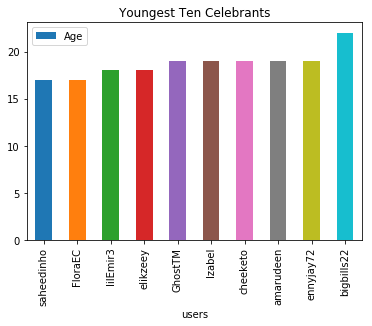

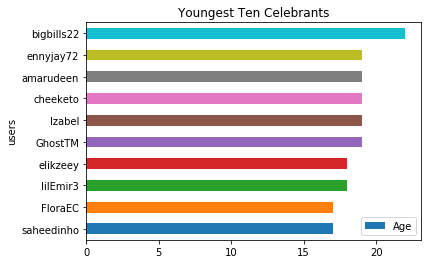

In [22]:
youngestTen.plot(x = 'users', y = 'Age', kind = 'bar', title = 'Youngest Ten Celebrants')

youngestTen.plot(x = 'users', y = 'Age', kind = 'barh', title = 'Youngest Ten Celebrants')

In [23]:
youngestTen["percentage"] = (youngestTen['Age'] * 100) / youngestTen['Age'].sum()

youngestTen


,users,Age,date,Age_plus_10,Age at 2005,percentage
102,saheedinho,17,2018-07-29,27,4,9.090909
101,FloraEC,17,2018-07-29,27,4,9.090909
64,lilEmir3,18,2018-07-29,28,5,9.625668
77,elikzeey,18,2018-07-29,28,5,9.625668
106,GhostTM,19,2018-07-29,29,6,10.160428
105,Izabel,19,2018-07-29,29,6,10.160428
40,cheeketo,19,2018-07-29,29,6,10.160428
39,amarudeen,19,2018-07-29,29,6,10.160428
96,ennyjay72,19,2018-07-29,29,6,10.160428
117,bigbills22,22,2018-07-29,32,9,11.764706


### Pie Chart of Youngest Ten

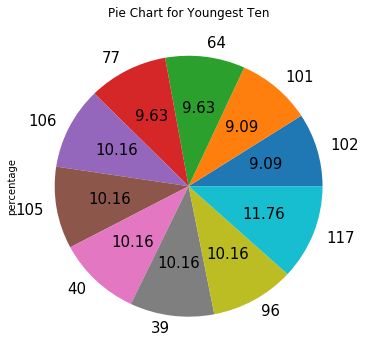

In [24]:
youngestTen['percentage'].plot.pie(autopct = '%.2f', fontsize = 15, figsize = (6,6), title = 'Pie Chart for Youngest Ten')

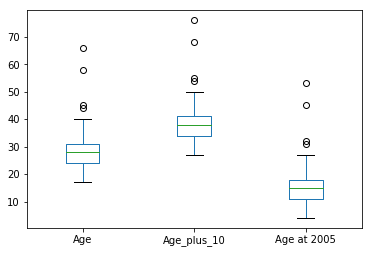

In [25]:
dFrame.plot.box()

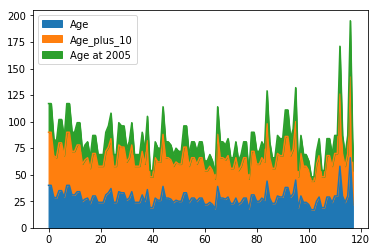

In [26]:
dFrame.plot.area()

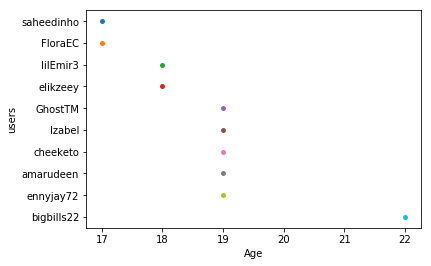

In [27]:
sns.stripplot(x = 'Age', y = 'users', data = youngestTen)

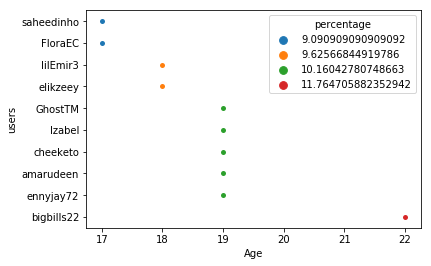

In [28]:
sns.stripplot(x = 'Age', y = 'users', data = youngestTen, hue = 'percentage')

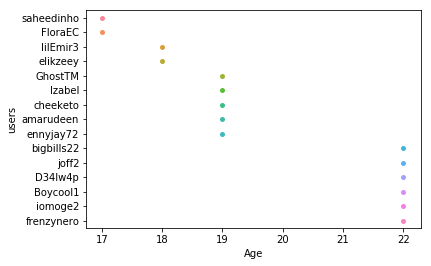

In [29]:
sns.swarmplot(x = 'Age', y = 'users', data = dFrame.sort_values(by = 'Age', ascending = True)[:15])

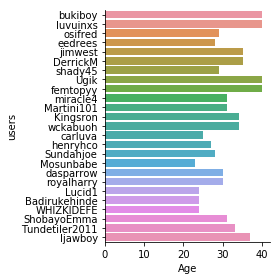

In [30]:
sns.factorplot(x = 'Age', y = 'users', data = dFrame[:25], kind = 'bar')

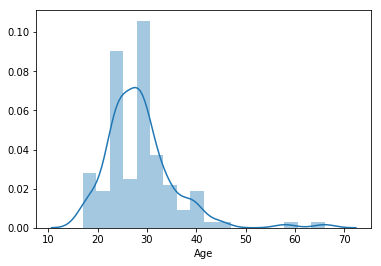

In [31]:
sns.distplot(dFrame['Age'])

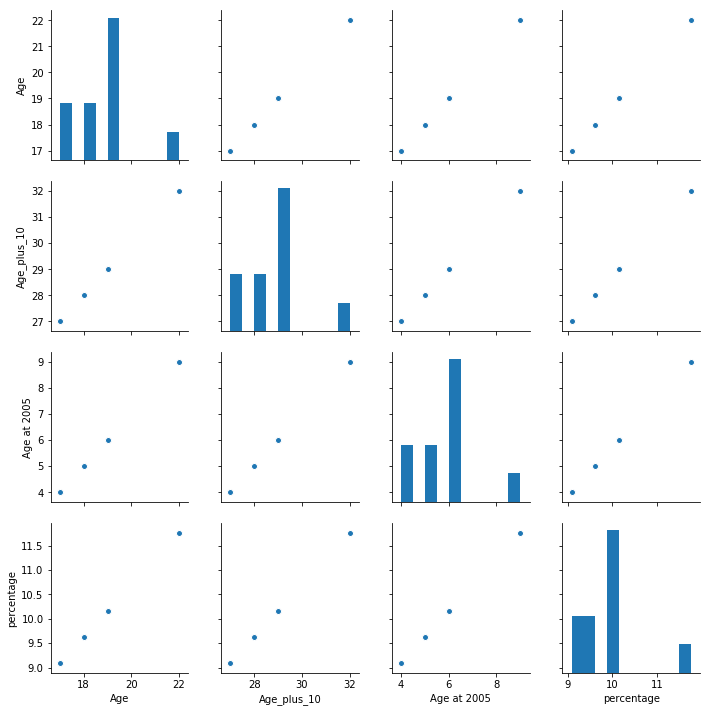

In [32]:
sns.pairplot(youngestTen)

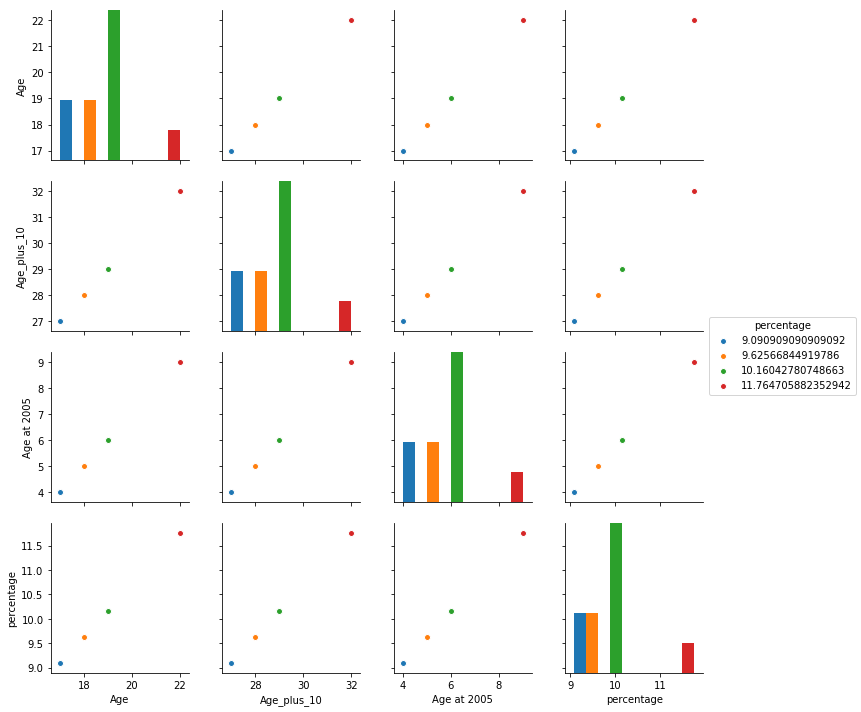

In [34]:
sns.pairplot(youngestTen, hue = 'percentage')

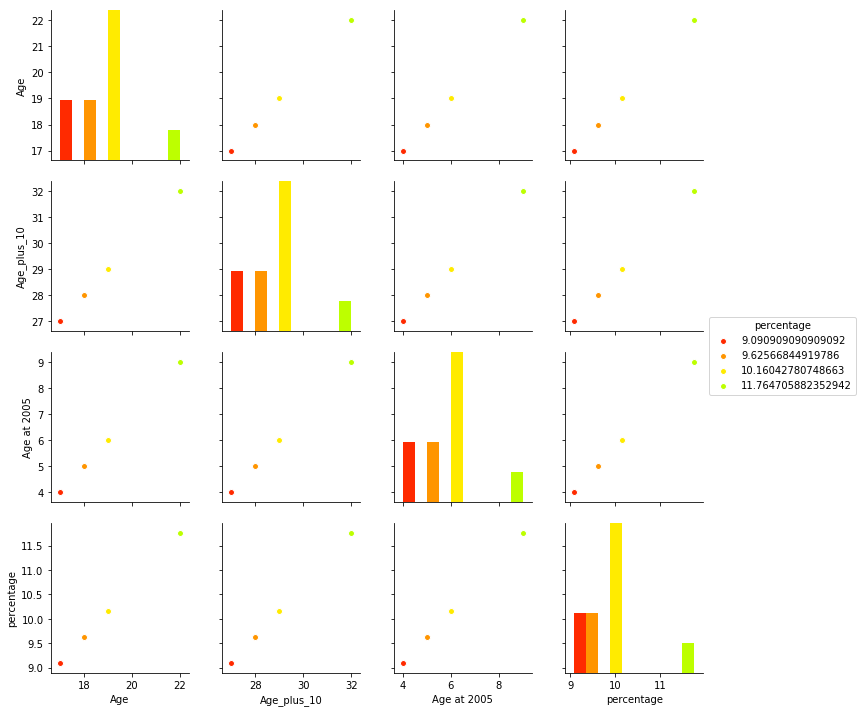

In [44]:
sns.pairplot(youngestTen, hue = 'percentage', palette = 'prism')

### Used the bundled seaborn datasets for a while

In [88]:
usingTitanic = sns.load_dataset('titanic')
# themNames = sns.get_dataset_names()

# themNames
usingTitanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


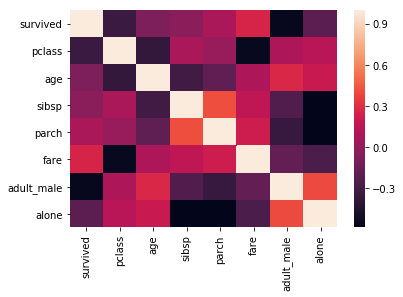

In [90]:
forHeatMap = usingTitanic.sort_values(by = 'age', ascending = True).corr()
sns.heatmap(forHeatMap)

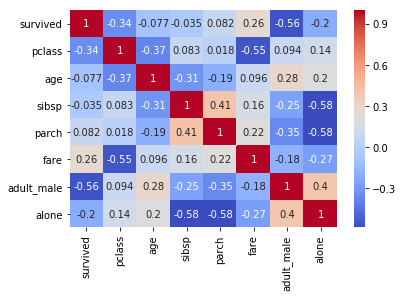

In [92]:
sns.heatmap(forHeatMap, cmap = 'coolwarm', annot = True)

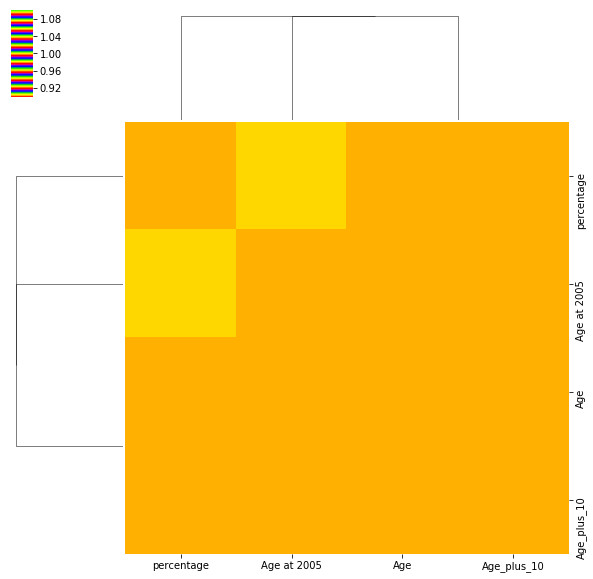

In [84]:
sns.clustermap(youngestTen.corr(), cmap = 'prism')
# dFrame.head()